In [1]:
!nvidia-smi

Sat Oct 18 09:27:13 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   38C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install ultralytics roboflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 88.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 136.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="eEATZ3kwrl29ojbGCoG6")
project = rf.workspace("rafsan-kabir").project("bird_detection-ndpzp")
version = project.version(1)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Bird_Detection-1 in yolov11:: 100%|██████████| 1922/1922 [00:00<00:00, 6070.23it/s]


In [4]:
from ultralytics import YOLO


model = YOLO("yolo11n.pt")

model.train(
    data="/content/Bird_Detection-1/data.yaml",
    epochs=50,
    imgsz=640,
    batch=16,
    device=0
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.217 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Bird_Detection-1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, ker

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a03ce388e90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [5]:
results = model.predict(
    source="/content/Bird_Detection-1/test/images",
    conf=0.4, save=True
)



image 1/5 /content/Bird_Detection-1/test/images/tumblr_2e7af05ab88b34afc80bf3f2ad347aee_58606241_1280_jpg.rf.b9e1f9af6457cae56103761ee71b73b9.jpg: 640x640 (no detections), 12.5ms
image 2/5 /content/Bird_Detection-1/test/images/tumblr_b1a7918f0a86ef6074e767bcea8f6863_e04df589_1280_jpg.rf.4292a3453c4fd26cc3c5fe19842a537b.jpg: 640x640 (no detections), 8.7ms
image 3/5 /content/Bird_Detection-1/test/images/tumblr_e26fc9771c9d9c79f0f1468c99f24c12_9e9143fd_2048_jpg.rf.58a3bdfbeaa7a848e16aa925abf6c0d7.jpg: 640x640 1 owl, 8.2ms
image 4/5 /content/Bird_Detection-1/test/images/tumblr_oht0jkSFIA1roirddo1_1280_jpg.rf.7a4c58ebaf571bc32a8ec65fe1fcc1ba.jpg: 640x640 (no detections), 8.9ms
image 5/5 /content/Bird_Detection-1/test/images/tumblr_pzggj38tcf1roirddo1_1280_jpg.rf.a305b4c77a4b81b3698b22e4b817deb7.jpg: 640x640 1 owl, 8.7ms
Speed: 2.5ms preprocess, 9.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict


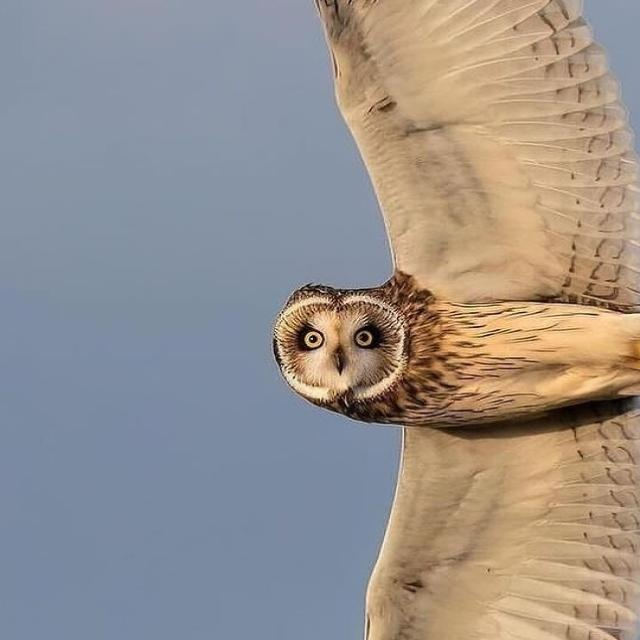

In [7]:
from IPython.display import Image, display
import glob

for img_path in glob.glob("/content/runs/detect/predict/tumblr_2e7af05ab88b34afc80bf3f2ad347aee_58606241_1280_jpg.rf.b9e1f9af6457cae56103761ee71b73b9.jpg"):
    display(Image(filename=img_path))


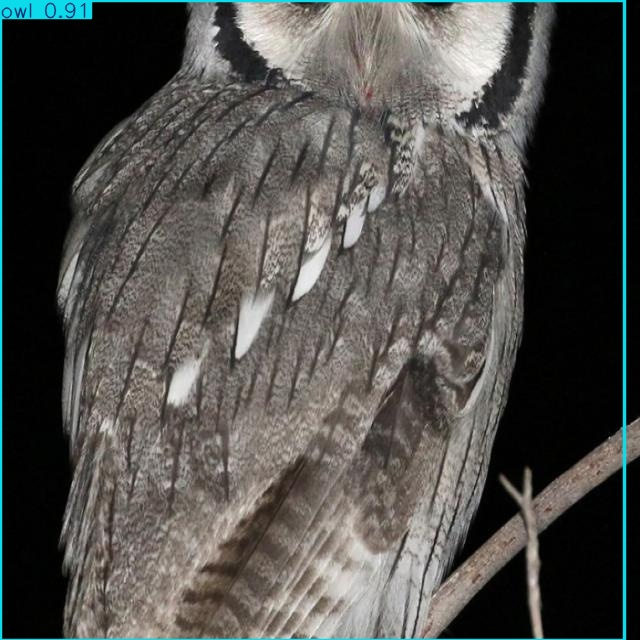

In [9]:
for img_path in glob.glob("/content/runs/detect/predict/tumblr_e26fc9771c9d9c79f0f1468c99f24c12_9e9143fd_2048_jpg.rf.58a3bdfbeaa7a848e16aa925abf6c0d7.jpg"):
    display(Image(filename=img_path))

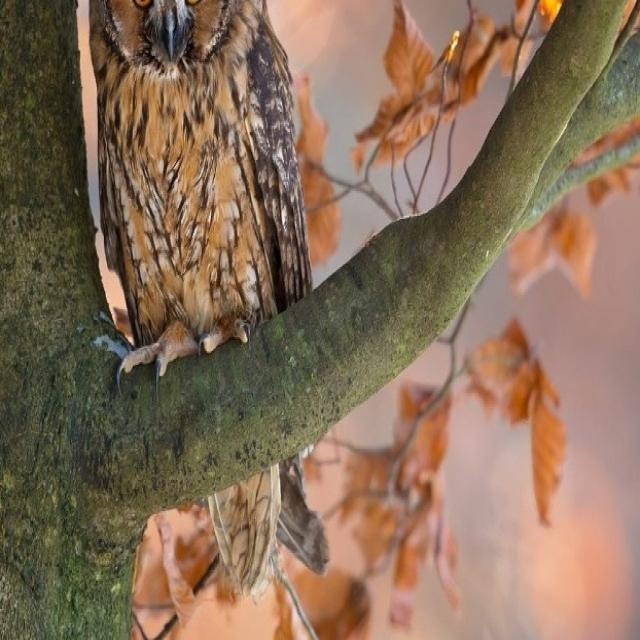

In [11]:
for img_path in glob.glob("/content/runs/detect/predict/tumblr_oht0jkSFIA1roirddo1_1280_jpg.rf.7a4c58ebaf571bc32a8ec65fe1fcc1ba.jpg"):
    display(Image(filename=img_path))

In [17]:
from google.colab import files
uploaded = files.upload("/content/different_birds_image")



Saving 47936637501_cc2b877743_b.jpg to /content/different_birds_image/47936637501_cc2b877743_b (2).jpg


In [18]:
for filename in uploaded.keys():
    results = model.predict(source=filename, conf=0.4, save=True)



image 1/1 /content/different_birds_image/47936637501_cc2b877743_b (2).jpg: 448x640 1 owl, 10.7ms
Speed: 4.1ms preprocess, 10.7ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/runs/detect/predict


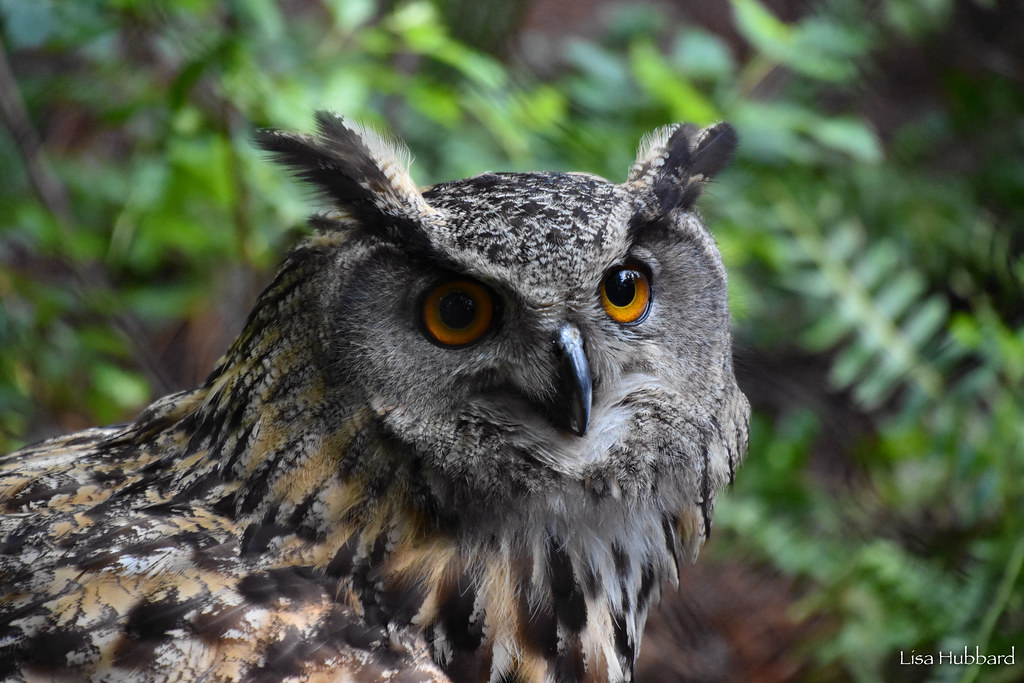

In [19]:
import os
display(Image(filename=f"/content/different_birds_image/47936637501_cc2b877743_b (1).jpg"))


In [20]:
results = model.predict(source=filename, conf=0.4)
print(results[0].boxes.data)
print(results[0].names)


image 1/1 /content/different_birds_image/47936637501_cc2b877743_b (2).jpg: 448x640 1 owl, 28.7ms
Speed: 6.0ms preprocess, 28.7ms inference, 5.0ms postprocess per image at shape (1, 3, 448, 640)
tensor([[  0.0000, 128.3020, 768.4394, 683.0000,   0.8413,   1.0000]], device='cuda:0')
{0: 'eagle', 1: 'owl', 2: 'sparrow'}


In [21]:
results = model.predict(
    source="/content/different_birds_image",
    conf=0.4,
    save=True
)



image 1/7 /content/different_birds_image/47936637501_cc2b877743_b (1).jpg: 448x640 1 owl, 9.0ms
image 2/7 /content/different_birds_image/47936637501_cc2b877743_b (2).jpg: 448x640 1 owl, 8.1ms
image 3/7 /content/different_birds_image/47936637501_cc2b877743_b.jpg: 448x640 1 owl, 8.0ms
image 4/7 /content/different_birds_image/download.jpeg: 384x640 (no detections), 50.4ms
image 5/7 /content/different_birds_image/images (1).jpeg: 448x640 1 sparrow, 8.7ms
image 6/7 /content/different_birds_image/images.jpeg: 256x640 1 eagle, 50.7ms
image 7/7 /content/different_birds_image/istockphoto-160326924-612x612.jpg: 448x640 (no detections), 9.6ms
Speed: 2.2ms preprocess, 20.7ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/runs/detect/predict


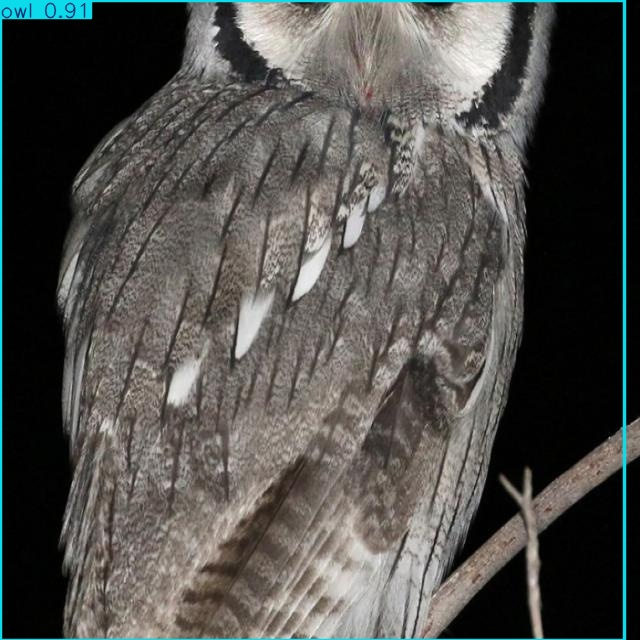

In [22]:
from IPython.display import Image, display
import glob

for img_path in glob.glob("/content/runs/detect/predict/tumblr_e26fc9771c9d9c79f0f1468c99f24c12_9e9143fd_2048_jpg.rf.58a3bdfbeaa7a848e16aa925abf6c0d7.jpg"):
    display(Image(filename=img_path))


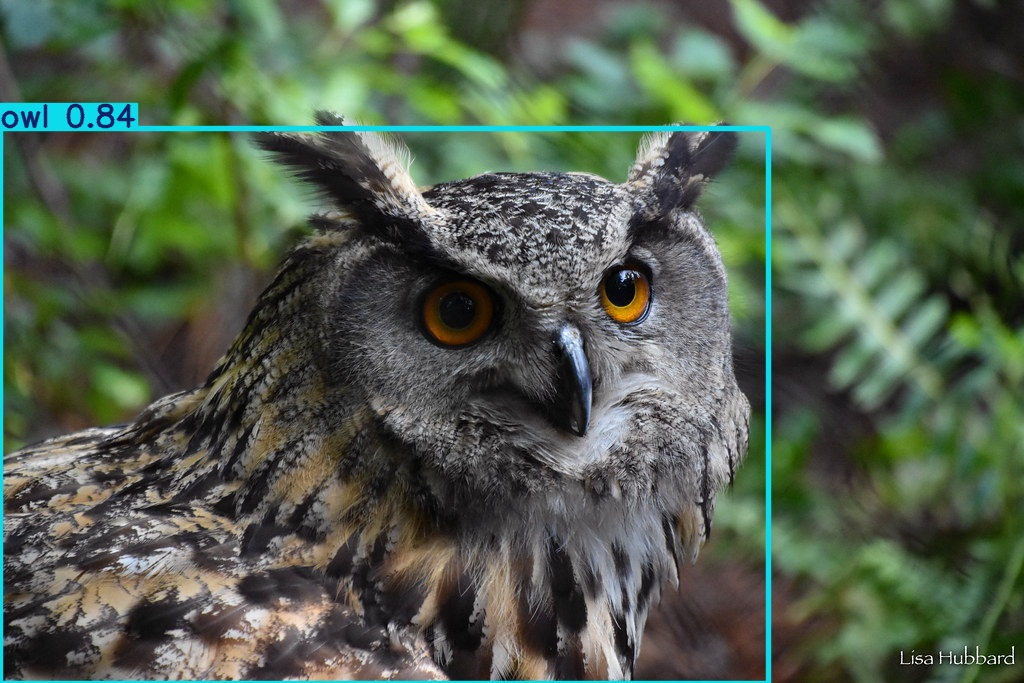

In [23]:
for img_path in glob.glob("/content/runs/detect/predict/47936637501_cc2b877743_b (2).jpg"):
    display(Image(filename=img_path))

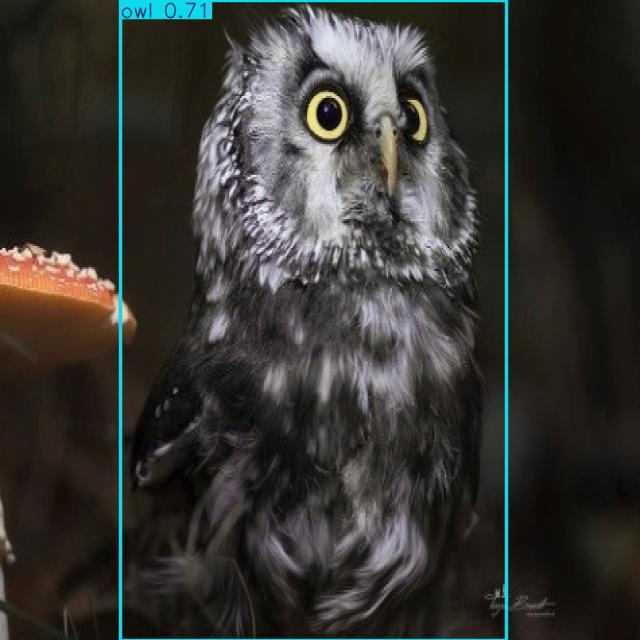

In [24]:
for img_path in glob.glob("/content/runs/detect/predict/tumblr_pzggj38tcf1roirddo1_1280_jpg.rf.a305b4c77a4b81b3698b22e4b817deb7.jpg"):
    display(Image(filename=img_path))

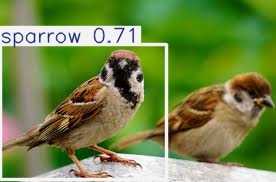

In [25]:
for img_path in glob.glob("/content/runs/detect/predict/images (1).jpg"):
    display(Image(filename=img_path))

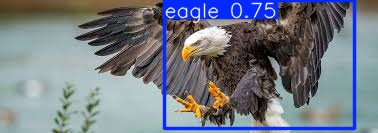

In [26]:
for img_path in glob.glob("/content/runs/detect/predict/images.jpg"):
    display(Image(filename=img_path))

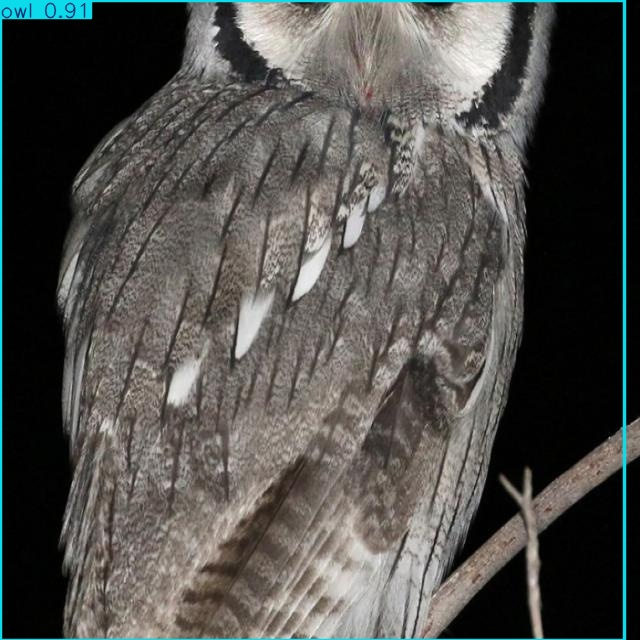

In [29]:
for img_path in glob.glob("/content/runs/detect/predict/tumblr_e26fc9771c9d9c79f0f1468c99f24c12_9e9143fd_2048_jpg.rf.58a3bdfbeaa7a848e16aa925abf6c0d7.jpg"):
    display(Image(filename=img_path))